Notes to try: Feature importance; conversion of data to 0 and 1; logistic regression threshold

In [733]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.model_selection import  cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_validate
from sklearn.metrics import log_loss, precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn.metrics import make_scorer
import seaborn as sns
import matplotlib.pyplot as plt
import itertools


In [698]:
dfraw = pd.read_csv('/Users/robholmstrom/Downloads/patient.csv')

In [699]:
dfraw.shape

(95839, 20)

In [700]:
pd.set_option("display.max_rows", 101)

In [701]:
dfraw.head(3)

,sex,patient_type,intubated,pneumonia,age,pregnant,diabetes,copd,asthma,immunosuppression,hypertension,other_diseases,cardiovascular,obesity,chronic_kidney_failure,smoker,another_case,outcome,icu,death_date
0,2,1,97,2,42,97,2,2,1,2,2,2,2,2,2,2,99,1,97,9999-99-99
1,1,1,97,2,51,2,2,2,2,2,2,2,2,2,2,2,99,1,97,9999-99-99
2,2,2,2,2,51,97,1,2,2,2,1,2,2,1,2,2,99,1,2,9999-99-99


In [702]:
for x in dfraw:
    print(dfraw[x].value_counts())

2    48720
1    47119
Name: sex, dtype: int64
1    70268
2    25571
Name: patient_type, dtype: int64
97    70268
2     23613
1      1934
99       24
Name: intubated, dtype: int64
2     78203
1     17628
99        8
Name: pneumonia, dtype: int64
30     2390
31     2390
35     2370
29     2367
34     2366
       ... 
100      11
99        9
101       4
102       4
113       1
Name: age, Length: 104, dtype: int64
97    48720
2     45909
1       978
98      232
Name: pregnant, dtype: int64
2     82544
1     12878
98      417
Name: diabetes, dtype: int64
2     92973
1      2462
98      404
Name: copd, dtype: int64
2     91102
1      4328
98      409
Name: asthma, dtype: int64
2     93099
1      2314
98      426
Name: immunosuppression, dtype: int64
2     78721
1     16716
98      402
Name: hypertension, dtype: int64
2     90639
1      4642
98      558
Name: other_diseases, dtype: int64
2     92437
1      2986
98      416
Name: cardiovascular, dtype: int64
2     79852
1     15597
98      390

In [704]:
dfraw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95839 entries, 0 to 95838
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   sex                     95839 non-null  int64 
 1   patient_type            95839 non-null  int64 
 2   intubated               95839 non-null  int64 
 3   pneumonia               95839 non-null  int64 
 4   age                     95839 non-null  int64 
 5   pregnant                95839 non-null  int64 
 6   diabetes                95839 non-null  int64 
 7   copd                    95839 non-null  int64 
 8   asthma                  95839 non-null  int64 
 9   immunosuppression       95839 non-null  int64 
 10  hypertension            95839 non-null  int64 
 11  other_diseases          95839 non-null  int64 
 12  cardiovascular          95839 non-null  int64 
 13  obesity                 95839 non-null  int64 
 14  chronic_kidney_failure  95839 non-null  int64 
 15  sm

In [705]:
dfraw.columns

Index(['sex', 'patient_type', 'intubated', 'pneumonia', 'age', 'pregnant',
       'diabetes', 'copd', 'asthma', 'immunosuppression', 'hypertension',
       'other_diseases', 'cardiovascular', 'obesity', 'chronic_kidney_failure',
       'smoker', 'another_case', 'outcome', 'icu', 'death_date'],
      dtype='object')

# Data cleaning

In [706]:

# Select out continous variable in seperate list
unaltercols = ['age','outcome']
# Select all columns that  will be treated the same way
altercols = ['sex', 'patient_type', 'intubated', 'pneumonia',
       'diabetes', 'copd', 'asthma', 'immunosuppression', 'hypertension',
       'other_diseases', 'cardiovascular', 'obesity', 'chronic_kidney_failure',
       'smoker']

# Eliminate unclears (98 values), clear nulls (99)  and convert non-applicable (97) to 'no' for all columns
# except pregnant or icu columns.
# This will allow more choice downstream.
dfreplace = pd.concat([dfraw[unaltercols], dfraw[altercols].replace({99:np.nan, 97:2, 98:np.nan, 3:np.nan})], axis = 1)

# Further eliminate nulls from pregnant column
dfreplace1 = pd.concat([dfreplace,dfraw['pregnant'].replace(98,np.nan)], axis = 1)                    

# Further eliminate nulls from icu column
dfreplace2 = pd.concat([dfreplace1, dfraw['icu'].replace(99, np.nan)],axis=1)
dfreplace2 = dfreplace2.loc[dfreplace2['patient_type'] == 2,:]
dfreplace2 = pd.get_dummies(dfreplace2, columns = ['outcome']).drop('patient_type', axis = 1)
dfreplace2.columns

Index(['age', 'sex', 'intubated', 'pneumonia', 'diabetes', 'copd', 'asthma',
       'immunosuppression', 'hypertension', 'other_diseases', 'cardiovascular',
       'obesity', 'chronic_kidney_failure', 'smoker', 'pregnant', 'icu',
       'outcome_1', 'outcome_2', 'outcome_3'],
      dtype='object')

In [707]:
dfreplace2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25571 entries, 2 to 95836
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     25571 non-null  int64  
 1   sex                     25571 non-null  float64
 2   intubated               25547 non-null  float64
 3   pneumonia               25571 non-null  float64
 4   diabetes                25386 non-null  float64
 5   copd                    25397 non-null  float64
 6   asthma                  25391 non-null  float64
 7   immunosuppression       25377 non-null  float64
 8   hypertension            25397 non-null  float64
 9   other_diseases          25289 non-null  float64
 10  cardiovascular          25382 non-null  float64
 11  obesity                 25394 non-null  float64
 12  chronic_kidney_failure  25391 non-null  float64
 13  smoker                  25392 non-null  float64
 14  pregnant                25521 non-null

# Feature engineering

In [708]:
# Define the label that will be predicted--if icu, then make sure intubated is not in the feature list
target = 'intubated'

# Choose whether to iterate back from SelectKbest and input to features (kbestcols) OR custom features (customcols)
kbest_feat_cols = ['age', 'sex', 'diabetes', 'obesity', 'outcome_2']
custom_feat_cols = ['age', 'sex', 'intubated', 'pneumonia', 'diabetes', 'copd', 'asthma',
       'immunosuppression', 'hypertension', 'other_diseases', 'cardiovascular',
       'obesity', 'chronic_kidney_failure', 'smoker', 'icu',
       'outcome_1', 'outcome_2', 'outcome_3']
if target in custom_feat_cols:
    custom_feat_cols.remove(target)


# Based on whether using kbestcols or customcols, designate dropped columns, but will leave the target in the list
dfdropcols = [x for x in dfreplace2 if x not in custom_feat_cols and x!= target]

dfdrop = dfreplace2.drop(dfdropcols, axis = 1)
dfdrop.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 25571 entries, 2 to 95836
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     25571 non-null  int64  
 1   sex                     25571 non-null  float64
 2   intubated               25547 non-null  float64
 3   pneumonia               25571 non-null  float64
 4   diabetes                25386 non-null  float64
 5   copd                    25397 non-null  float64
 6   asthma                  25391 non-null  float64
 7   immunosuppression       25377 non-null  float64
 8   hypertension            25397 non-null  float64
 9   other_diseases          25289 non-null  float64
 10  cardiovascular          25382 non-null  float64
 11  obesity                 25394 non-null  float64
 12  chronic_kidney_failure  25391 non-null  float64
 13  smoker                  25392 non-null  float64
 14  icu                     25546 non-null

In [843]:
# In case pregnancy is as feature, the following code builds two dataframes to choose from: dfpreg or dfall 
if 'pregnant' in dfdrop:
    # dfpreg excludes non-applicables i.e. males (97) and allows select analysis of pregnancy effect in women
    dfpreg = dfdrop.loc[(dfdrop['pregnant']==1) | (dfdrop['pregnant']==2)]
    # dfall lumps non-applicables (97) into non-pregnant group (2) and will include males
    dfall = dfdrop.copy()
    dfall['pregnant'] = np.where(dfdrop['pregnant'] == 97, 2,dfdrop['pregnant'].values)
    if 'icu' in dfdrop:
        dfall['icu'] = np.where(dfall['icu']==97,2, dfall['icu'].values) # lumps non-applicable icu as no

# If pregnancy is not a feature, pass dfall with all original features intact and lumps non-applicable icu as no
else:
    if 'icu' in dfdrop:
        dfall = dfdrop.copy()
        dfall['icu'] = np.where(dfall['icu']==97,2, dfall['icu'].values)
    else:
        dfall = dfdrop.copy()

# If icu is used as a target, the following code builds two dataframes from dfall: dficu or dfallicu 
if target == 'icu':
    dfallicu = dfall.copy()
    dfallicu['icu'] = np.where(dfallicu['icu']==97,2, dfallicu['icu'].values) # lumps non-applicable icu as no
    dficu = dfdrop.loc[(dfdrop['icu']==2) | (dfdrop['icu']==1)] # includes only instances with clear icu status
    
# If icu a feature instead of target, the following code builds two further dataframes: dficu or dficuonly    
else:
    if 'icu' in dfdrop:
        dficu = dfdrop.loc[(dfdrop['icu']==2) | (dfdrop['icu']==1)] # rows with clear icu status
        dficuonly = dfdrop.loc[(dfdrop['icu']==1)].drop('icu', axis = 1)
        dfallicu = dfdrop.copy()
    else:
        dfall = dfdrop.copy()
        dficu = dfdrop.copy()
        dfallicu = dfdrop.copy()
        dficuonly = dfdrop.copy()

# Choose whether to ask if pregnancy is a predictor among women only (dfpreg) or include men among 
# pregnancies (dfall)

# In addition, choose whether using 'icu' applicable entries only (dficu) or include non-applicable 'icu' 
# entries as no dficuall or choose instances for patients admitted to icu (dficuonly)



# Choose df here:

df = dficu



In [964]:
#Convert all 2s to 0 as they represent 'no' and 1 represents yes, except age, if in columns

if 'age' in df:
    columns_for_conversion = df.columns.tolist()
    columns_for_conversion.remove('age')
    df[columns_for_conversion] = df.loc[:,columns_for_conversion].replace(2,0)
else:
    df.replace(2,0, inplace=True)
df


/Users/robholmstrom/miniconda3/lib/python3.7/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,age,sex,intubated,pneumonia,diabetes,copd,asthma,immunosuppression,hypertension,other_diseases,cardiovascular,obesity,chronic_kidney_failure,smoker,icu,outcome_1,outcome_2,outcome_3
2,51,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1,0,0
3,57,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0
4,44,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0
5,40,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0
7,89,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95832,54,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1
95833,45,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,1
95834,59,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1
95835,50,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,1


In [965]:
# Deleting leftover nulls from conversion of 99 and 98 to NaN
df_non_nulls = df.dropna()

# Checking nulls have been eliminated
df_non_nulls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25134 entries, 2 to 95836
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     25134 non-null  int64  
 1   sex                     25134 non-null  float64
 2   intubated               25134 non-null  float64
 3   pneumonia               25134 non-null  float64
 4   diabetes                25134 non-null  float64
 5   copd                    25134 non-null  float64
 6   asthma                  25134 non-null  float64
 7   immunosuppression       25134 non-null  float64
 8   hypertension            25134 non-null  float64
 9   other_diseases          25134 non-null  float64
 10  cardiovascular          25134 non-null  float64
 11  obesity                 25134 non-null  float64
 12  chronic_kidney_failure  25134 non-null  float64
 13  smoker                  25134 non-null  float64
 14  icu                     25134 non-null

In [966]:
# Investigate cross-feature correlations to eliminate multicolinearity
df_non_nulls.corr()

,age,sex,intubated,pneumonia,diabetes,copd,asthma,immunosuppression,hypertension,other_diseases,cardiovascular,obesity,chronic_kidney_failure,smoker,icu,outcome_1,outcome_2,outcome_3
age,1.000000,-0.018918,0.031109,0.097560,0.297262,0.235824,-0.047198,-0.038330,0.378744,-0.030433,0.144239,0.063938,0.091027,0.075926,0.008384,0.126199,-0.167155,0.062222
sex,-0.018918,1.000000,-0.028485,-0.063378,0.040879,0.035976,0.075205,0.034882,0.052622,0.044353,0.024007,0.060485,0.004957,-0.122180,-0.033377,-0.096115,0.113816,-0.029012
intubated,0.031109,-0.028485,1.000000,0.185150,0.029607,-0.005461,-0.017340,-0.002339,0.019912,-0.007930,0.017293,0.050568,0.005871,0.014291,0.446484,0.088774,-0.053300,-0.043791
pneumonia,0.097560,-0.063378,0.185150,1.000000,0.065150,0.019847,-0.028795,0.000330,0.042086,-0.015151,0.018907,0.036244,-0.001254,0.014955,0.143320,0.097155,-0.105571,0.016418
diabetes,0.297262,0.040879,0.029607,0.065150,1.000000,0.086376,-0.014618,0.010404,0.368582,-0.018404,0.093931,0.085666,0.180272,0.023378,0.021534,0.044481,-0.051900,0.012373
copd,0.235824,0.035976,-0.005461,0.019847,0.086376,1.000000,0.056679,0.052244,0.128425,0.022324,0.145950,0.027309,0.058137,0.134695,-0.006644,-0.061863,0.081723,-0.030207
asthma,-0.047198,0.075205,-0.017340,-0.028795,-0.014618,0.056679,1.000000,0.024547,0.004345,0.003369,0.012339,0.045979,-0.009621,0.006957,-0.002770,-0.039451,0.054474,-0.022474
immunosuppression,-0.038330,0.034882,-0.002339,0.000330,0.010404,0.052244,0.024547,1.000000,0.009511,0.179880,0.062928,-0.013651,0.114956,0.015686,0.010202,-0.081204,0.104163,-0.035414
hypertension,0.378744,0.052622,0.019912,0.042086,0.368582,0.128425,0.004345,0.009511,1.000000,0.001142,0.195033,0.134955,0.223998,0.035039,0.015566,0.022059,-0.019130,-0.002865
other_diseases,-0.030433,0.044353,-0.007930,-0.015151,-0.018404,0.022324,0.003369,0.179880,0.001142,1.000000,0.048225,-0.015665,0.023838,0.008540,0.014005,-0.084647,0.104284,-0.031065


In [967]:
# Seperate features and target for modeling
X = df_non_nulls.drop(target, axis=1)
y = df_non_nulls[target]

In [968]:
k = 5
if len(X.columns) >= k:
    skb = SelectKBest(k = k, score_func = f_classif)
    best_kfit = skb.fit(X, y)
    X_best_feat = best_kfit.fit_transform(X,y)

    X_best_feat = pd.DataFrame(X_best_feat, columns=X.columns[best_kfit.get_support()])

    print(X_best_feat.columns)
else:
    pass

Index(['pneumonia', 'obesity', 'icu', 'outcome_1', 'outcome_2'], dtype='object')


In [969]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

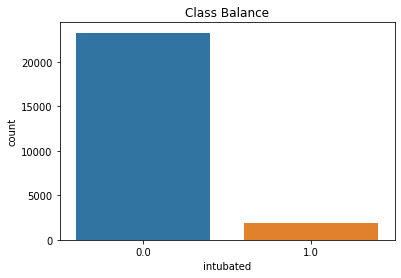

In [970]:
sns.countplot(y)
plt.title('Class Balance')
plt.show()

# Logistic Regressions

Class imbalance will pose a problem for predicting instances of the less frequent category e.g intubated

In [971]:
lr1 = LogisticRegression()
thresholds = [x for x in np.arange(.02,1,.01)]
c_values = [10**x for x in range(-3,2)]
params = {'solver':['liblinear','lbfgs'], 'C':c_values, 'penalty':['l2'], 'max_iter': [10000]}

gslr1 = GridSearchCV(lr1, params)
gslr1.fit(X_train, y_train)


print(gslr1.best_params_)
    
y_test_predlr1 = gslr1.predict(X_test)
y_train_predlr1 = gslr1.predict(X_train)

y_train_probs = gslr1.predict_proba(X_train)
y_test_probs = gslr1.predict_proba(X_test)

test_intubation_scores = []
train_intubation_scores = []
y_pred_test_thresh = []
y_pred_train_thresh = []
for i in thresholds:
    
    y_pred_test_thresh = [1 if x[1] >= i else 0 for x in y_test_probs]
    test_intubation_scores.append(recall_score(y_test, y_pred_test_thresh, average = 'macro'))
    
    y_pred_train_thresh = [1 if x[1] >= i else 0 for x in y_train_probs]
    train_intubation_scores.append(recall_score(y_train, y_pred_train_thresh, average = 'macro'))

best_test_thresh = thresholds[test_intubation_scores.index(max(test_intubation_scores))]
best_train_thresh = thresholds[train_intubation_scores.index(max(train_intubation_scores))]

y_pred_test_thresh = [1 if x[1] >= best_test_thresh else 0 for x in y_test_probs]   
y_pred_train_thresh = [1 if x[1] >= best_train_thresh else 0 for x in y_train_probs]




print('Best threshold for test macro average recall score for intubation is ', best_test_thresh)



{'C': 10, 'max_iter': 10000, 'penalty': 'l2', 'solver': 'lbfgs'}
Best threshold for test macro average recall score for intubation is  0.06


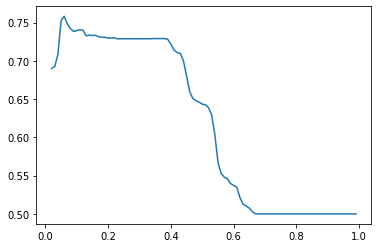

In [972]:
sns.lineplot(thresholds, test_intubation_scores)


In [973]:
# for x in range(len(y_test_probs)): 
#     print(y_test_probs[x], y_test_predlr1[x], y_pred_test_thresh[x])


In [974]:
# report = classification_report(y_test, y_pred_test_thresh, target_names=['not '+ target, target])
# print(report)

In [975]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=None):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    
   

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')
        
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="red" if cm[i, j] > thresh else "red")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="red" if cm[i, j] > thresh else "red")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

In [976]:
from sklearn.metrics import confusion_matrix
print('LR1 confusion matrix')
lr1train = confusion_matrix(y_train, y_pred_train_thresh, normalize= None)
lr1test = confusion_matrix(y_test, y_pred_test_thresh, normalize = None)


LR1 confusion matrix


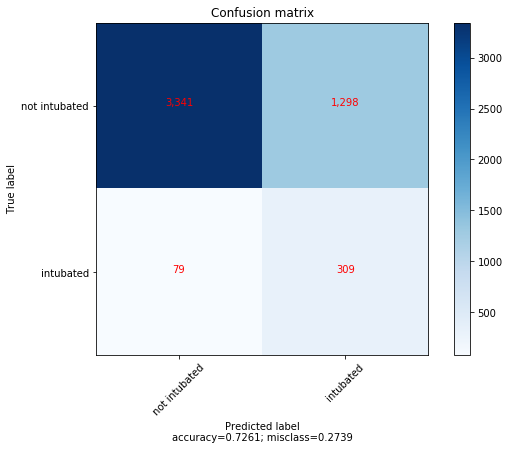

In [977]:
target_names = ['not intubated', 'intubated']
plot_confusion_matrix(lr1test,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=None)

In [978]:
                                         
lr1best = LogisticRegression(**gslr1.best_params_)
lr1best.fit(X_train, y_train)
abs_coefs = sorted(np.abs(lr1best.coef_[0]))
coefs = pd.DataFrame(abs_coefs, index=X_train.columns, columns=['Coef'])
coefs.loc['INTERCEPT'] = [lr1best.intercept_[0]]
coefs

,Coef
age,0.000902
sex,0.009078
pneumonia,0.019783
diabetes,0.050824
copd,0.056399
asthma,0.063800
immunosuppression,0.075949
hypertension,0.145327
other_diseases,0.145657
cardiovascular,0.196192


# Random Forests

In [989]:

rf1 = RandomForestClassifier(max_depth=7,  max_features=3,  n_estimators=1000)
rf1.fit(X_train, y_train)

y_test_predrf1 = rf1.predict(X_test)
y_train_predrf1 = rf1.predict(X_train)
print('Test macro average recall score is ',recall_score(y_test, y_test_predrf1, average = 'macro'))
print(f'Train macro average recall score is ', recall_score(y_train, y_train_predrf1,average = 'macro'))


Test macro average recall score is  0.5124554705399982
Train macro average recall score is  0.5228184005022917


In [990]:
print('RF1 confusion matrix')
print('Training\n', confusion_matrix(y_train, y_train_predrf1, normalize= None))
print('Test\n', confusion_matrix(y_test, y_test_predrf1, normalize = None))

RF1 confusion matrix
Training
 [[18625    11]
 [ 1403    68]]
Test
 [[4635    4]
 [ 378   10]]


# K Nearest Neighbors

In [994]:

knn1 = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='ball_tree', leaf_size=10)
knn1.fit(X_train, y_train)

y_test_predknn1 = knn1.predict(X_test)
y_train_predknn1 = knn1.predict(X_train)
print('Test macro average recall score is ',recall_score(y_test, y_test_predknn1,average = 'macro'))
print('Train macro average recall score is ',recall_score(y_train, y_train_predknn1,average = 'macro'))


Test macro average recall score is  0.5558293313302947
Train macro average recall score is  0.6072672585782012


In [995]:

print(f'KNN1 cv scores are {cross_val_score(knn1, X, y, cv= 5)}')



KNN1 cv scores are [0.92898349 0.92918241 0.92778993 0.92719316 0.92578591]


In [996]:
print('knn1 confusion matrix')
print('Training\n', confusion_matrix(y_train, y_train_predknn1, normalize= None))
print('Test\n', confusion_matrix(y_test, y_test_predknn1, normalize = None))

knn1 confusion matrix
Training
 [[18542    94]
 [ 1148   323]]
Test
 [[4607   32]
 [ 342   46]]


# Support Vector Classification

In [664]:
c_values = [10**x for x in range(-2, 2)]
svmlin = SVC()
parameters = {'kernel':['linear'], 'C':c_values}
svmgrid = GridSearchCV(svmlin, parameters)
svmgrid.fit(X_train, y_train)

y_train_predsvmgrid = svmgrid.predict(X_train)
y_test_predsvmgrid = svmgrid.predict(X_test)

print(f'Test macro average recall score is {recall_score(y_test, y_test_predsvmgrid,average = 'macro')}')
print(f'Train macro average recall score is {recall_score(y_train, y_train_predsvmgrid,average = 'macro')}')
print(svmgrid.best_params_)


Test recall score is 0.0
Train recall score is 0.0
{'C': 0.01, 'kernel': 'linear'}


In [665]:

print('svmrbf confusion matrix')
print('Training\n', confusion_matrix(y_train, y_train_predsvmgrid, normalize= None))
print('Test\n', confusion_matrix(y_test,y_test_predsvmgrid, normalize = None))


svmrbf confusion matrix
Training
 [[18593     0]
 [ 1478     0]]
Test
 [[4643    0]
 [ 375    0]]


In [618]:
print(f'SVMlin cv scores are {cross_val_score(svmlin, X, y, cv= 5)}')

SVMlin cv scores are [0.54265403 0.54028436 0.54028436 0.53080569 0.5415677 ]
